In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
missing_values=df.isnull().sum()
missing_values

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
percentage_missing = (missing_values / len(df)) * 100
percentage_missing

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [6]:
df.drop('Xylene', axis=1, inplace=True)

In [7]:
columns_to_drop = ['PM10  ','NH3 ', 'Benzene','Toluene ','AQI_Bucket ']  # Replace with the actual column names
columns_to_drop = [col.strip() for col in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)


In [8]:
df.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
count,24933.000000,25949.000000,25946.000000,25346.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,67.450578,17.574730,28.560659,32.309123,2.248598,14.531977,34.491430,166.463581
std,64.661449,22.785846,24.474746,31.646011,6.962884,18.133775,21.694928,140.696585
min,0.040000,0.020000,0.010000,0.000000,0.000000,0.010000,0.010000,13.000000
25%,28.820000,5.630000,11.750000,12.820000,0.510000,5.670000,18.860000,81.000000
50%,48.570000,9.890000,21.690000,23.520000,0.890000,9.160000,30.840000,118.000000
75%,80.590000,19.950000,37.620000,40.127500,1.450000,15.220000,45.570000,208.000000
max,949.990000,390.680000,362.210000,467.630000,175.810000,193.860000,257.730000,2049.000000


In [9]:

# fill missing values in multiple columns with their medians
columns_to_fill = ['PM2.5  ', 'NO ', 'NO2','NOx ','CO   ','SO2 ','O3  ','AQI ']
columns_to_fill = [col.strip() for col in columns_to_fill]

# Calculate the medians for the specified columns
medians = df[columns_to_fill].median()

# Fill missing values with medians
df[columns_to_fill] = df[columns_to_fill].fillna(medians)


In [10]:
missing_values=df.isnull().sum()
missing_values

City     0
Date     0
PM2.5    0
NO       0
NO2      0
NOx      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [11]:
percentage_missing = (missing_values / len(df)) * 100
percentage_missing

City     0.0
Date     0.0
PM2.5    0.0
NO       0.0
NO2      0.0
NOx      0.0
CO       0.0
SO2      0.0
O3       0.0
AQI      0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    29531 non-null  object 
 1   Date    29531 non-null  object 
 2   PM2.5   29531 non-null  float64
 3   NO      29531 non-null  float64
 4   NO2     29531 non-null  float64
 5   NOx     29531 non-null  float64
 6   CO      29531 non-null  float64
 7   SO2     29531 non-null  float64
 8   O3      29531 non-null  float64
 9   AQI     29531 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.3+ MB


In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
PM2.5,1.000000,0.435245,0.358287,0.375938,0.093695,0.120451,0.166064,0.633654
NO,0.435245,1.000000,0.465848,0.747409,0.221445,0.174881,0.020788,0.438039
NO2,0.358287,0.465848,1.000000,0.581938,0.361750,0.388413,0.289435,0.531952
NOx,0.375938,0.747409,0.581938,1.000000,0.231878,0.205912,0.089095,0.436282
CO,0.093695,0.221445,0.361750,0.231878,1.000000,0.476784,0.043311,0.650475
SO2,0.120451,0.174881,0.388413,0.205912,0.476784,1.000000,0.160489,0.454182
O3,0.166064,0.020788,0.289435,0.089095,0.043311,0.160489,1.000000,0.199100
AQI,0.633654,0.438039,0.531952,0.436282,0.650475,0.454182,0.199100,1.000000


In [14]:
# Iterate through all columns and print unique values
for column_name in df.columns:
    unique_values_count = df[column_name].nunique()
    print(f'Column: {column_name}')
    print('Unique Values:', unique_values_count)
    print('-' * 40)

Column: City
Unique Values: 26
----------------------------------------
Column: Date
Unique Values: 2009
----------------------------------------
Column: PM2.5
Unique Values: 11716
----------------------------------------
Column: NO
Unique Values: 5776
----------------------------------------
Column: NO2
Unique Values: 7404
----------------------------------------
Column: NOx
Unique Values: 8156
----------------------------------------
Column: CO
Unique Values: 1779
----------------------------------------
Column: SO2
Unique Values: 4761
----------------------------------------
Column: O3
Unique Values: 7699
----------------------------------------
Column: AQI
Unique Values: 829
----------------------------------------


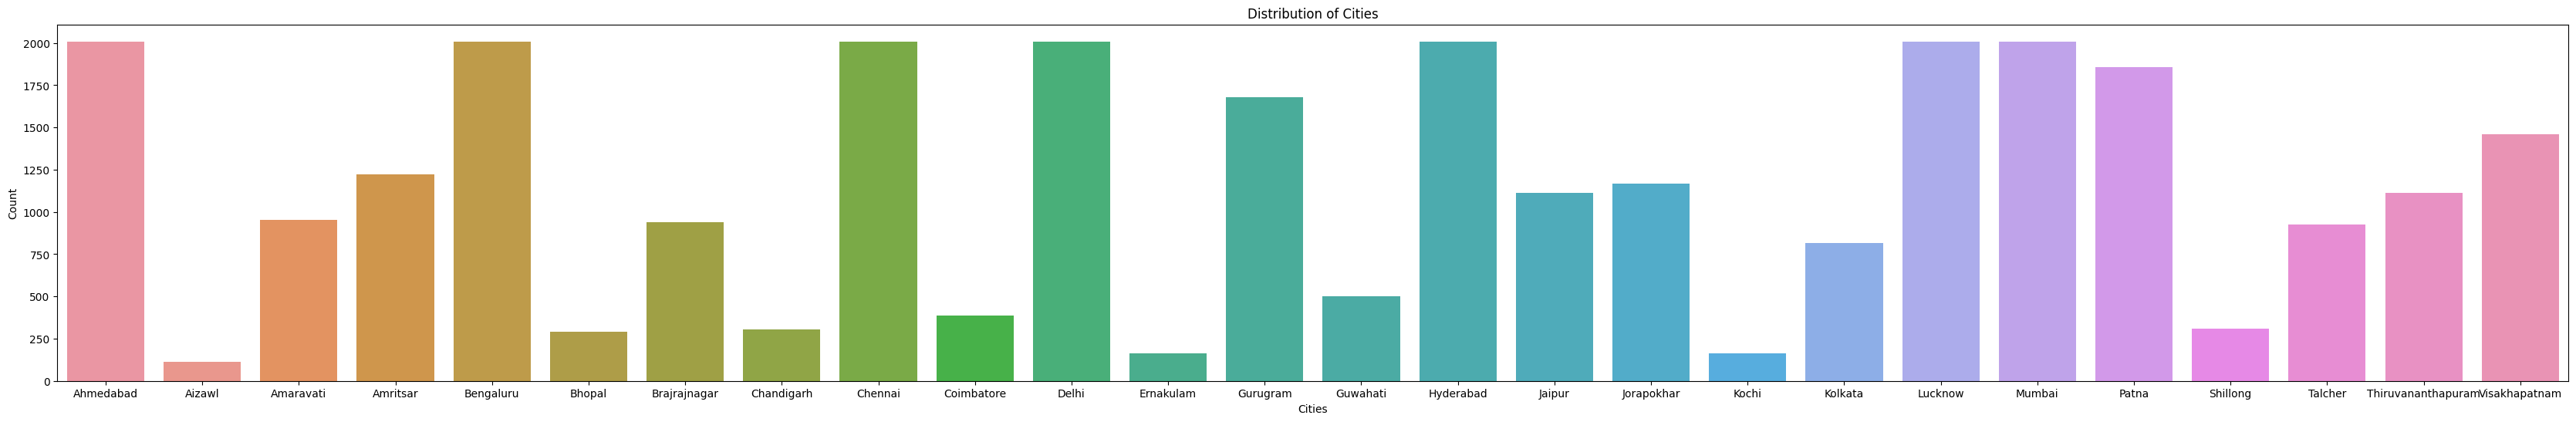

In [15]:
# Create a countplot for the column with two categories
plt.figure(figsize=(42, 6))  # Set the figure size
sns.countplot(x='City', data=df)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Distribution of Cities')
plt.show()

In [16]:
# Use value_counts() to count unique values
value_counts = df['City'].value_counts()

# Display the counts
print(value_counts)

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64


In [17]:
df.columns

Index(['City', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [18]:
df1 = df.copy()
df['Vehicular Pollution content'] = df['PM2.5']+df['NO']+df['NO2']+df['NOx']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']
df = df.drop(['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3',],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          29531 non-null  object 
 1   Date                          29531 non-null  object 
 2   AQI                           29531 non-null  float64
 3   Vehicular Pollution content   29531 non-null  float64
 4   Industrial Pollution content  29531 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


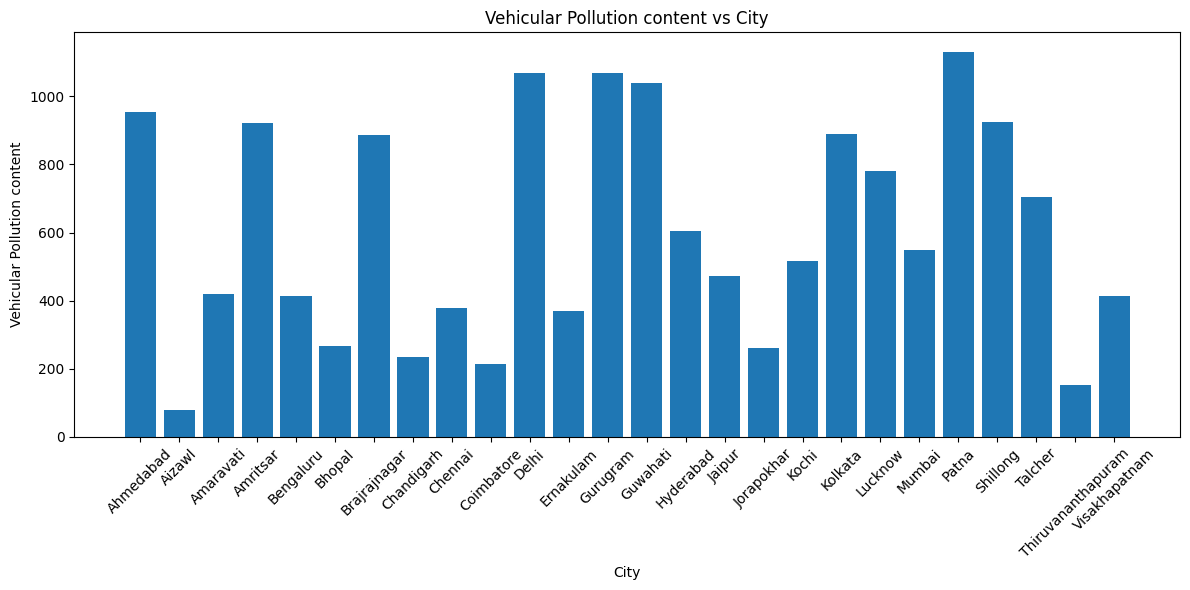

In [19]:

# 'Vehicular Pollution content' and 'Industrial Pollution content'

# Plot Vehicular Pollution content vs City
plt.figure(figsize=(12, 6))
plt.bar(df['City'], df['Vehicular Pollution content'])
plt.title('Vehicular Pollution content vs City')
plt.xlabel('City')
plt.ylabel('Vehicular Pollution content')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


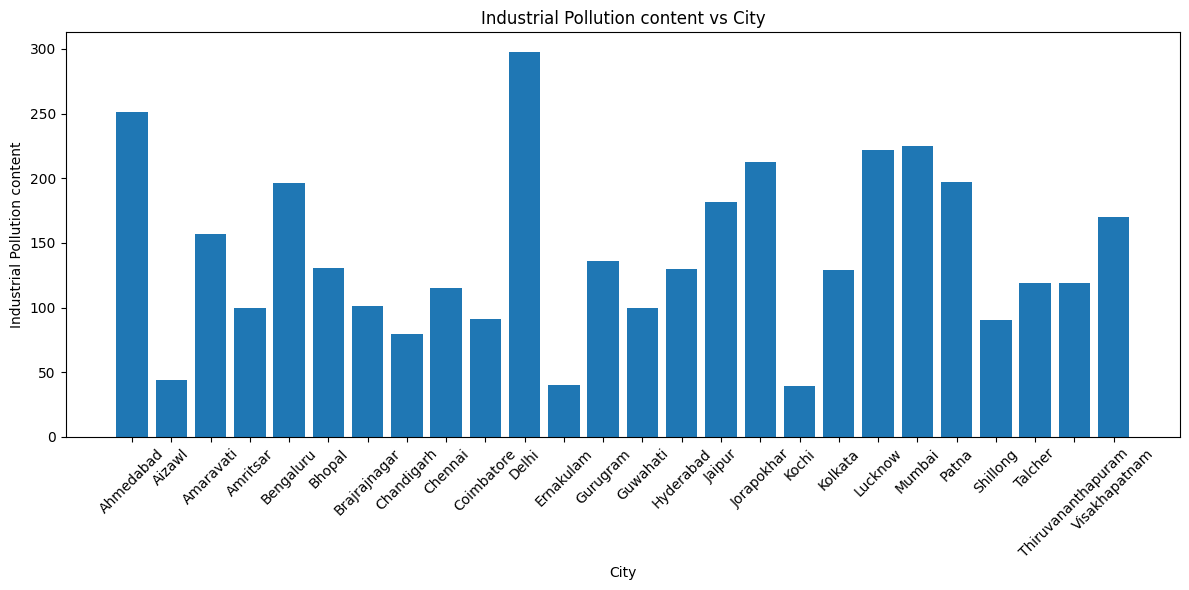

In [20]:

# Plot Industrial Pollution content vs City
plt.figure(figsize=(12, 6))
plt.bar(df['City'], df['Industrial Pollution content'])
plt.title('Industrial Pollution content vs City')
plt.xlabel('City')
plt.ylabel('Industrial Pollution content')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [21]:
# Group the DataFrame by 'City' and calculate the sum of 'Industrial Pollution content'
city_grouped = df.groupby('City')['Industrial Pollution content'].sum().reset_index()

# Sort the grouped DataFrame by 'Industrial Pollution content' in descending order
city_sorted = city_grouped.sort_values(by='Industrial Pollution content', ascending=False)

# Select the top 10 most polluted cities
top_10_polluted_cities = city_sorted.head(10)

# Display the top 10 polluted cities
print(top_10_polluted_cities)



             City  Industrial Pollution content
0       Ahmedabad                     154471.92
10          Delhi                     132592.59
21          Patna                     105890.00
19        Lucknow                      93941.52
20         Mumbai                      86892.10
14      Hyderabad                      85753.74
8         Chennai                      80972.48
4       Bengaluru                      76849.50
12       Gurugram                      73129.52
25  Visakhapatnam                      71043.75


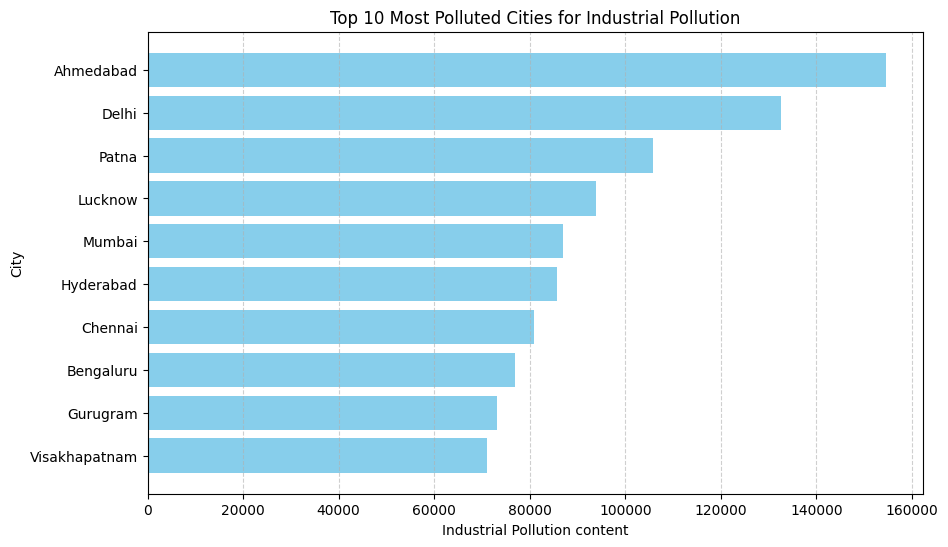

In [22]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_polluted_cities['City'], top_10_polluted_cities['Industrial Pollution content'], color='skyblue')
plt.xlabel('Industrial Pollution content')
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities for Industrial Pollution')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest pollution at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [23]:
# Group the DataFrame by 'City' and calculate the sum of 'Vehicular Pollution content'
city_grouped = df.groupby('City')['Vehicular Pollution content'].sum().reset_index()

# Sort the grouped DataFrame by 'Industrial Pollution content' in descending order
city_sorted = city_grouped.sort_values(by='Vehicular Pollution content', ascending=False)

# Select the top 10 most polluted cities
top_10_polluted_cities = city_sorted.head(10)

# Display the top 10 polluted cities
print(top_10_polluted_cities)


             City  Vehicular Pollution content
10          Delhi                    537173.97
21          Patna                    410122.10
0       Ahmedabad                    370121.32
19        Lucknow                    360985.78
12       Gurugram                    302219.20
20         Mumbai                    265657.26
14      Hyderabad                    207234.37
4       Bengaluru                    192243.84
8         Chennai                    191463.34
25  Visakhapatnam                    175454.08


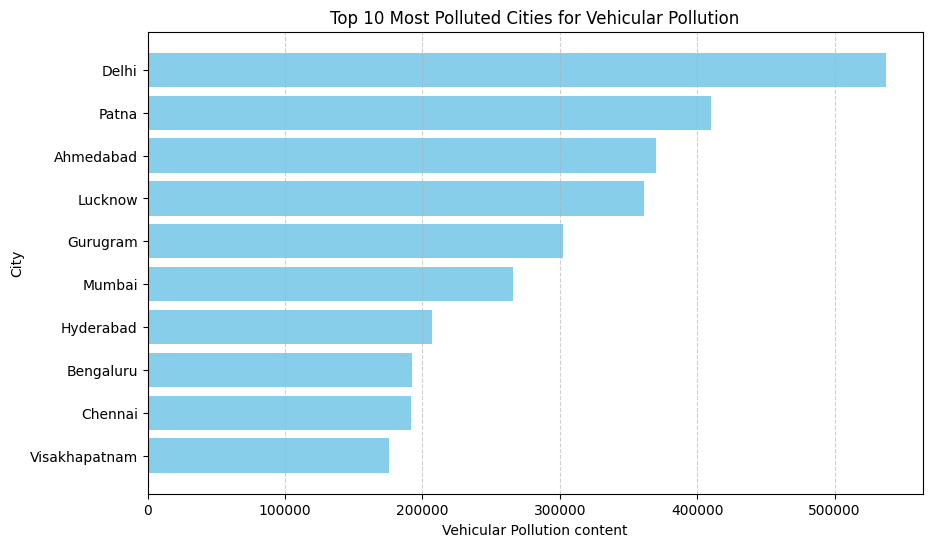

In [24]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_polluted_cities['City'], top_10_polluted_cities['Vehicular Pollution content'], color='skyblue')
plt.xlabel('Vehicular Pollution content')
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities for Vehicular Pollution')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest pollution at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [25]:
# Group the DataFrame by 'City' and calculate the sum of 'Industrial Pollution content'
city_grouped = df.groupby('City')['Industrial Pollution content'].sum().reset_index()

# Sort the grouped DataFrame by 'Industrial Pollution content' in ascending order
city_sorted = city_grouped.sort_values(by='Industrial Pollution content', ascending=True)

# Select the top 10 least polluted cities
top_10_least_polluted_cities = city_sorted.head(10)

# Display the top 10 least polluted cities
print(top_10_least_polluted_cities)


            City  Industrial Pollution content
1         Aizawl                       1496.88
17         Kochi                       3469.34
11     Ernakulam                       5535.80
7     Chandigarh                       9182.80
22      Shillong                      11022.28
9     Coimbatore                      14457.74
13      Guwahati                      19947.06
5         Bhopal                      20776.44
6   Brajrajnagar                      27517.65
18       Kolkata                      31847.49


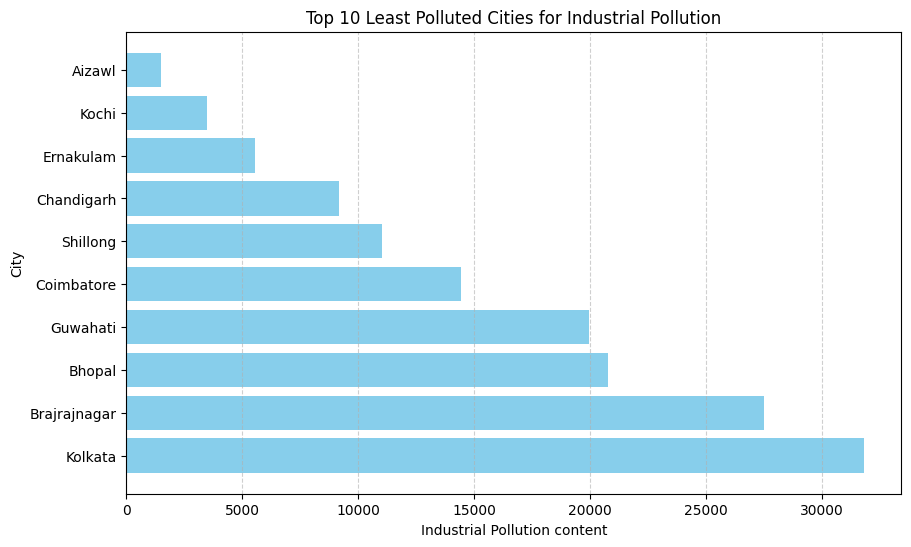

In [26]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_polluted_cities['City'], top_10_least_polluted_cities['Industrial Pollution content'], color='skyblue')
plt.xlabel('Industrial Pollution content')
plt.ylabel('City')
plt.title('Top 10 Least Polluted Cities for Industrial Pollution')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest pollution at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [27]:
# Group the DataFrame by 'City' and calculate the sum of 'Industrial Pollution content'
city_grouped = df.groupby('City')['Vehicular Pollution content'].sum().reset_index()

# Sort the grouped DataFrame by 'Industrial Pollution content' in ascending order
city_sorted = city_grouped.sort_values(by='Vehicular Pollution content', ascending=True)

# Select the top 10 least polluted cities
top_10_least_polluted_cities = city_sorted.head(10)

# Display the top 10 least polluted cities
print(top_10_least_polluted_cities)

                  City  Vehicular Pollution content
1               Aizawl                      4562.60
11           Ernakulam                     13622.08
22            Shillong                     14624.61
7           Chandigarh                     24178.87
17               Kochi                     30349.28
5               Bhopal                     32231.45
9           Coimbatore                     37685.62
24  Thiruvananthapuram                     57293.01
13            Guwahati                     71416.14
2            Amaravati                     77837.44


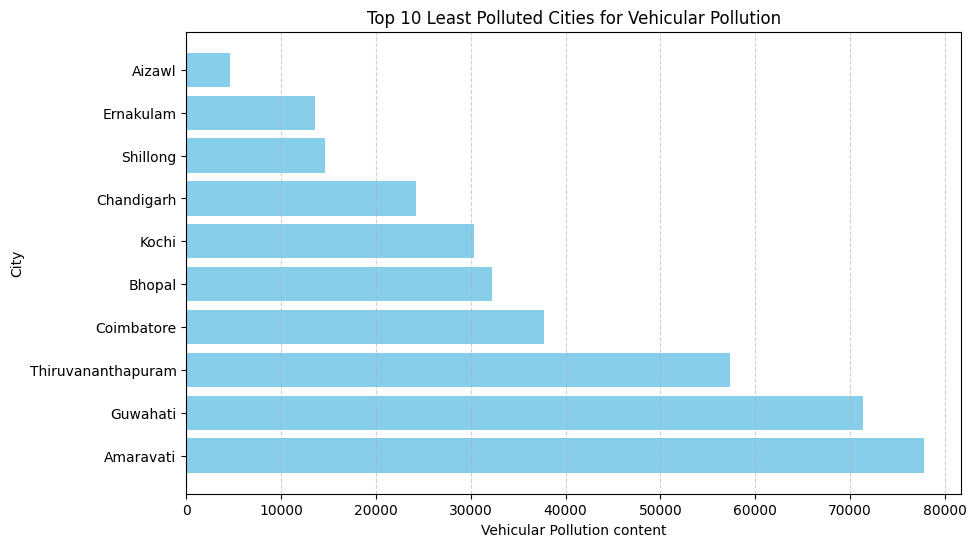

In [28]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_least_polluted_cities['City'], top_10_least_polluted_cities['Vehicular Pollution content'], color='skyblue')
plt.xlabel('Vehicular Pollution content')
plt.ylabel('City')
plt.title('Top 10 Least Polluted Cities for Vehicular Pollution')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest pollution at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [29]:
df.columns


Index(['City', 'Date', 'AQI', 'Vehicular Pollution content',
       'Industrial Pollution content'],
      dtype='object')

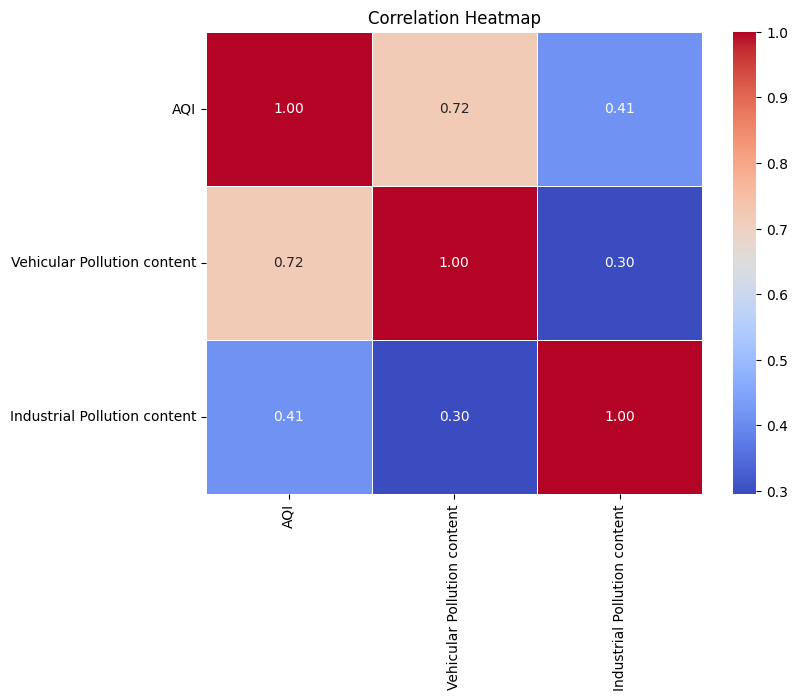

In [30]:

# Calculate correlations
correlation_matrix = df[['AQI', 'Vehicular Pollution content', 'Industrial Pollution content']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


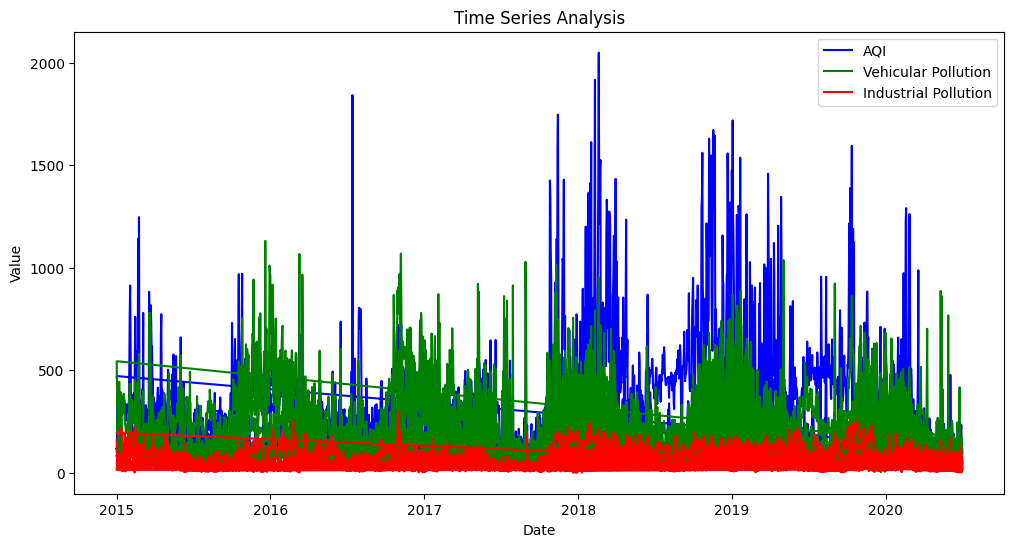

In [31]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot time series for AQI, Vehicular Pollution content, and Industrial Pollution content
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='blue')
plt.plot(df.index, df['Vehicular Pollution content'], label='Vehicular Pollution', color='green')
plt.plot(df.index, df['Industrial Pollution content'], label='Industrial Pollution', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X = df[['Vehicular Pollution content', 'Industrial Pollution content']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Root Mean Squared Error (RMSE): 80.45
